In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from nanonets import Simulation
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

plt.style.use(["science","bright","grid"])

# PARAMETERS
V_INPUT_MAX = 0.5
V_GATE_MAX  = 0.5
N_INPUTS    = 960
N_GATES     = 960
V_INPUT     = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
V_I_PLOT    = 1000*V_INPUT
V_GATES     = np.round(np.linspace(-V_GATE_MAX, V_GATE_MAX, N_INPUTS),4)
V_G_PLOT    = 1000*V_GATES
PATH        = "/home/jonasmensing/bagheera/data/1_funding_period/iv_curves/set/"

# Cap Matrix
topo    = {"Nx": 1,"Ny": 1, "electrode_type": ['constant','constant']}
sim_c   = Simulation(topo)
ele_c   = sim_c.ELE_CHARGE_A_C
cap_m   = sim_c.get_capacitance_matrix()
cap_t   = cap_m[0][0]
cap_g   = sim_c.self_capacitance_sphere(3.9,10.0)
cap_m   = sim_c.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,1.0)
def s_i_th(Ug, n):
    return ((n+0.5)*ele_c + cap_g*Ug)/(cap_t-cap_m)
def i_d_th(Ug, n):
    return ((0.5-n)*ele_c - cap_g*Ug)/(cap_m)

In [132]:
N_NP    = 3
TOPO    = {"Nx": N_NP, "Ny": N_NP, "e_pos" : [[0,0], [int((N_NP-1)/2),0], [N_NP-1,0], [0,int((N_NP-1)/2)],
                                              [0,N_NP-1], [N_NP-1,int((N_NP)/2)], [int((N_NP)/2),(N_NP-1)], [N_NP-1,N_NP-1]], "electrode_type": ['constant']*8}
N_INPUTS    = 100
V_INPUT     = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
SIM_DIC     = {"duration" : False, "ac_time" : 40e-9, "error_th" : 0.0, "max_jumps" : 1, "n_eq" : 0, "n_per_batch" : 1, "kmc_counting" : False, "min_batches" : 5}
volt        = np.zeros((N_INPUTS,9))
volt[:,0]   = V_INPUT
k_tots      = []

for v in volt:
    sim_c = Simulation(TOPO)
    sim_c.run_static_voltages(voltages=[v], target_electrode=7, sim_dic=SIM_DIC, verbose=True)
    k_tot = np.sum(sim_c.model.tunnel_rates)
    
    k_tots.append(k_tot)

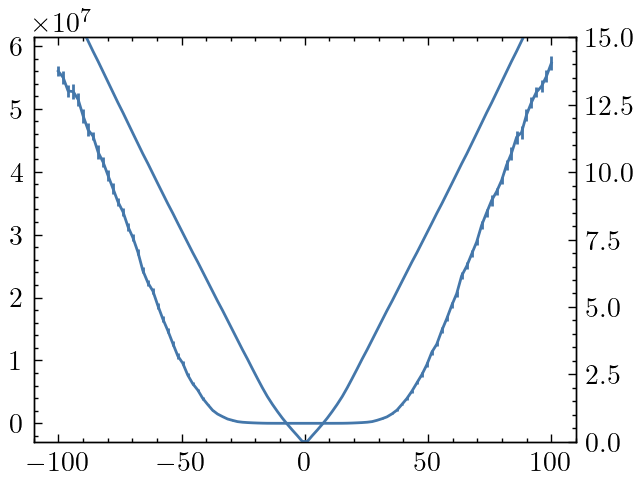

In [133]:
data    = pd.read_csv("../data/Nx=3_Ny=3_Ne=8_0.000.csv")
x_val   = data['E0'].values
y_val   = data['Observable'].values
y_err   = data['Error'].values

fig, ax = plt.subplots(dpi=200)
_       = ax.errorbar(x_val*1000, np.abs(y_val), y_err)
ax2     = ax.twinx()
_       = ax2.plot(x_val*1000, np.array(k_tots)*1e-10)
_       = ax2.set_ylim(0,15)
# _       = ax.set_ylim(0,5)
# _       = ax2.set_ylim(0,500)

ax.grid(False)
ax2.grid(False)

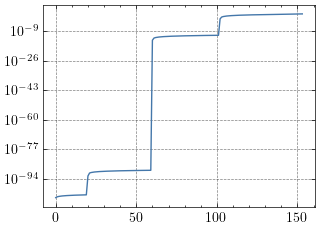

In [140]:
from scipy.interpolate import interp1d

I_th    = 10
x_vals  = np.linspace(0,50,1000)
y1_func = interp1d(data['E0'].values*1000, data['Observable'].values)
y2_func = interp1d(data['E0'].values*1000, np.array(k_tots))
y1_vals = y1_func(x_vals)
y2_vals = y2_func(x_vals)
plt.plot(y1_vals[y1_vals<I_th])
plt.yscale('log')

In [135]:
N_NP    = 9
TOPO    = {"Nx": N_NP, "Ny": N_NP, "e_pos" : [[0,0], [int((N_NP-1)/2),0], [N_NP-1,0], [0,int((N_NP-1)/2)],
                                              [0,N_NP-1], [N_NP-1,int((N_NP)/2)], [int((N_NP)/2),(N_NP-1)], [N_NP-1,N_NP-1]], "electrode_type": ['constant']*8}
N_INPUTS    = 100
V_INPUT     = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
SIM_DIC     = {"duration" : False, "ac_time" : 40e-9, "error_th" : 0.0, "max_jumps" : 1, "n_eq" : 0, "n_per_batch" : 1, "kmc_counting" : False, "min_batches" : 5}
volt        = np.zeros((N_INPUTS,9))
volt[:,0]   = V_INPUT
k_tots      = []

for v in volt:
    sim_c = Simulation(TOPO)
    sim_c.run_static_voltages(voltages=[v], target_electrode=7, sim_dic=SIM_DIC, verbose=True)
    k_tot = np.sum(sim_c.model.tunnel_rates)
    
    k_tots.append(k_tot)

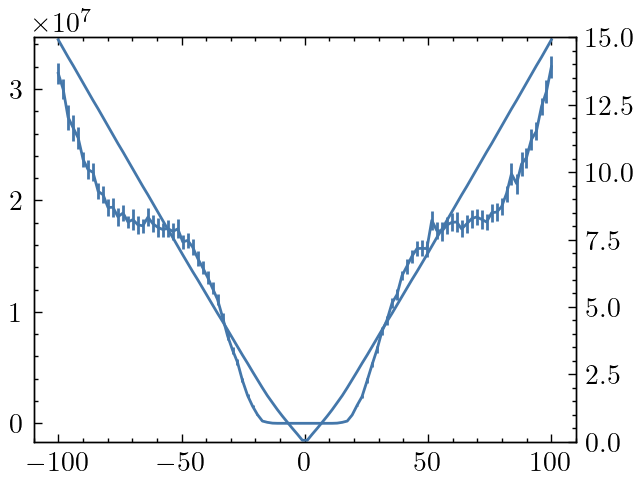

In [136]:
data    = pd.read_csv("../data/Nx=9_Ny=9_Ne=8_0.000.csv")
x_val   = data['E0'].values
y_val   = data['Observable'].values
y_err   = data['Error'].values

fig, ax = plt.subplots(dpi=200)
_       = ax.errorbar(x_val*1000, np.abs(y_val), y_err)
ax2     = ax.twinx()
_       = ax2.plot(x_val*1000, np.array(k_tots)*1e-10)
_       = ax2.set_ylim(0,15)
# _       = ax.set_ylim(0,5)
# _       = ax2.set_ylim(0,500)

ax.grid(False)
ax2.grid(False)

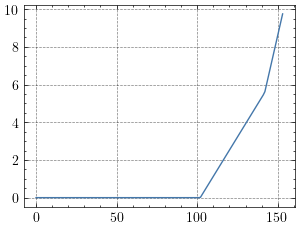

In [137]:
from scipy.interpolate import interp1d

I_th    = 10
x_vals  = np.linspace(0,50,1000)
y1_func = interp1d(data['E0'].values*1000, data['Observable'].values)
y2_func = interp1d(data['E0'].values*1000, np.array(k_tots))
y1_vals = y1_func(x_vals)
y2_vals = y2_func(x_vals)
plt.plot(y1_vals[y1_vals<I_th])

In [95]:
np.abs(y_val) < 10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [80]:
1/np.array(k_tots)

array([6.70479396e-12, 6.85308438e-12, 7.00777180e-12, 7.16895137e-12,
       7.33744997e-12, 7.51405878e-12, 7.69937905e-12, 7.89407163e-12,
       8.09886595e-12, 8.31456915e-12, 8.54207671e-12, 8.78238490e-12,
       9.03660530e-12, 9.30594486e-12, 9.58993213e-12, 9.89119554e-12,
       1.02120009e-11, 1.05543134e-11, 1.09203709e-11, 1.13127328e-11,
       1.17343401e-11, 1.21885892e-11, 1.26794235e-11, 1.32114483e-11,
       1.37900757e-11, 1.44205687e-11, 1.50960620e-11, 1.58365565e-11,
       1.66534439e-11, 1.75591887e-11, 1.85691233e-11, 1.97023224e-11,
       2.09828196e-11, 2.24413311e-11, 2.41177510e-11, 2.60648567e-11,
       2.83539661e-11, 3.10838626e-11, 3.43954258e-11, 3.84831325e-11,
       4.35036575e-11, 5.00294993e-11, 5.84121601e-11, 6.93346570e-11,
       8.42392785e-11, 1.05268799e-10, 1.37839034e-10, 1.99593342e-10,
       3.61593650e-10, 1.91981538e-09, 1.91981538e-09, 3.61593650e-10,
       1.99593342e-10, 1.37839034e-10, 1.05268799e-10, 8.42392785e-11,
      

In [3]:
data    = {Vg : pd.read_csv(f"{PATH}set_{Vg:.5f}.csv") for Vg in V_GATES}
pots    = {Vg : pd.read_csv(f"{PATH}mean_state_set_{Vg:.5f}.csv").iloc[:,2].values for Vg in V_GATES}

FileNotFoundError: [Errno 2] No such file or directory: '/home/jonasmensing/bagheera/data/1_funding_period/iv_curves/set/set_-0.50000.csv'

In [ ]:
q   = np.array([pots[Vg]*cap_t for Vg in V_GATES]) / sim_c.ELE_CHARGE_A_C
y   = np.array([data[Vg]['Observable'].values for Vg in V_GATES])
y_e = np.array([data[Vg]['Error'].values for Vg in V_GATES])

### Zero Gate

In [14]:
data0   = pd.read_csv("data/set_0.000.csv")
q0      = pd.read_csv("data/mean_state_set_0.000.csv").iloc[:,2] * cap_t / sim_c.ELE_CHARGE_A_C
y0      = data0['Observable'].values * 1e-9
ye0     = data0['Error'].values * 1e-9

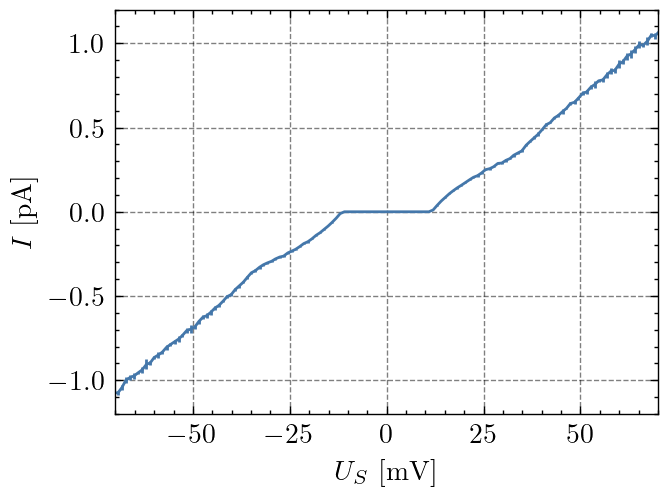

In [15]:
fig, ax = plt.subplots(dpi=200)
ax.errorbar(V_I_PLOT, y0, ye0)
ax.set_xlabel("$U_S$ [mV]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(-70,70)
ax.set_ylim(-1.2,1.2)
fig.savefig("plots/svg/SET_I_V_G0.svg", transparent=True)
fig.savefig("plots/pdf/SET_I_V_G0.pdf", transparent=False)
fig.savefig("plots/png/SET_I_V_G0.png", transparent=False)

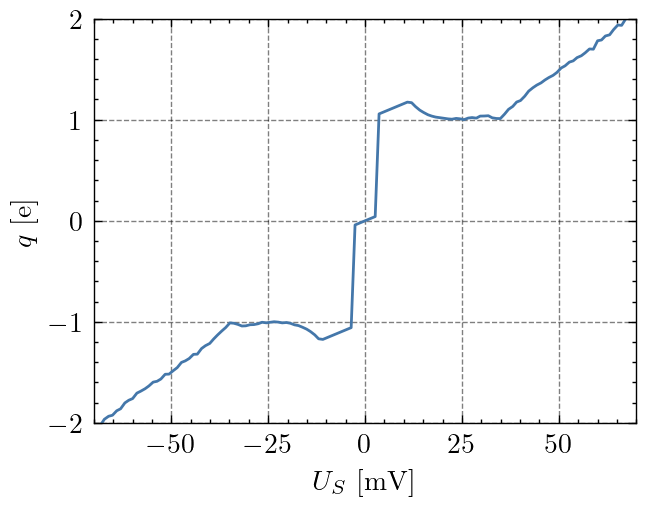

In [16]:
fig, ax = plt.subplots(dpi=200)
ax.plot(V_I_PLOT, q0)
ax.set_xlabel("$U_S$ [mV]")
ax.set_ylabel("$q$ [e]")
ax.set_xlim(-70,70)
ax.set_ylim(-2.0,2.0)
fig.savefig("plots/svg/SET_q_V_G0.svg", transparent=True)
fig.savefig("plots/pdf/SET_q_V_G0.pdf", transparent=False)
fig.savefig("plots/png/SET_q_V_G0.png", transparent=False)

### Diamonds

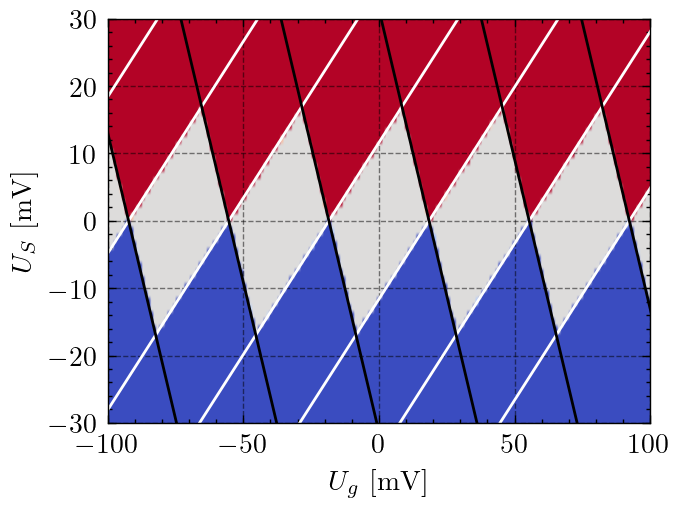

In [90]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(y.T, cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1, vmax=1, aspect='auto')
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-100,100)
ax.set_ylim(-30,30)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")
fig.savefig("plots/svg/SET_C_diamond.svg", transparent=True)
fig.savefig("plots/pdf/SET_C_diamond.pdf", transparent=False)
fig.savefig("plots/png/SET_C_diamond.png", transparent=False)

Text(0, 0.5, '$U_S$ [mV]')

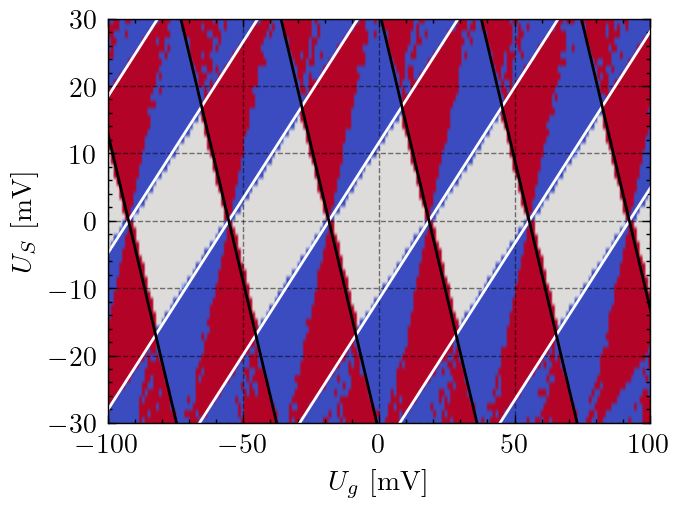

In [83]:
G       = np.gradient(y, V_I_PLOT, axis=0)
fig, ax = plt.subplots(dpi=200)
ax.imshow(G.T, cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1, vmax=1, aspect='auto')
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-100,100)
ax.set_ylim(-30,30)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")

Text(0, 0.5, '$U_S$ [mV]')

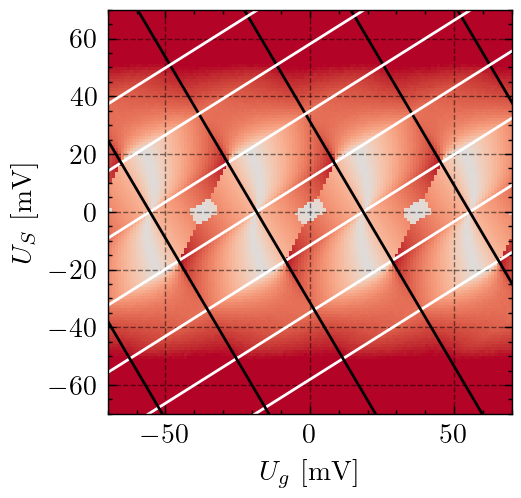

In [75]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(np.abs(q.T), cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1.5, vmax=1.5)
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-70,70)
ax.set_ylim(-70,70)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")